<a href="https://colab.research.google.com/github/mukanzi/Google-colab-Notebooks/blob/main/Alumni_Survey_Analysis_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alumni Survey analysis.

This notebook contains the code that will be used for the analysis of the alumni survey 2023.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

#Getting the data

In [ ]:
data=pd.read_csv('/content/Cleaned_data.csv')
data.head()

,Unnamed: 0,Respondent ID,Start Date,End Date,rq_flag,language,Consent,Weekly_Wellbeing_Score,Hindering: Work status,Hindering:Family situation,...,Gender,Country_of_residence,Secondary,undergraduate,Graduate,Graduation year,Contact Email,Phone,Communication Channel,Draw Email
0,2,1.144985e+11,12/31/2023 05:59:09 PM,12/31/2023 06:06:01 PM,0.0,en,Yes,4- Good,Work status,NaN,...,Male,Ghana,NaN,NaN,NaN,2022.0,nasirdampson1@gmail.com,+233 24 172 5046,"Another alumni via email, WhatsApp, or another...",nasirdampson1@gmail.com
1,3,1.144985e+11,12/31/2023 05:29:02 PM,12/31/2023 05:33:50 PM,0.0,en,Yes,3- Neutral/ok,NaN,NaN,...,Female,Nigeria,NaN,NaN,NaN,2019.0,agbonyinayomide80@gmail.com,+234 903 519 4844,Mastercard Foundation,agbonyinayomide80@gmail.com
2,4,1.144984e+11,12/31/2023 12:51:05 PM,12/31/2023 02:50:13 PM,0.0,en,Yes,4- Good,NaN,Family situation,...,Female,South Africa,NaN,University of Pretoria,University of Pretoria,2024.0,daggiydansa@gmail.com,+27 67 698 08,Mastercard Foundation,daggiydansa@gmail.com
3,5,1.144984e+11,12/31/2023 11:49:49 AM,12/31/2023 12:08:56 PM,0.0,en,Yes,3- Neutral/ok,NaN,Family situation,...,Female,Rwanda,NaN,NaN,NaN,NaN,mushimiyepelagie@gmail.com,+250 790 766 212,NaN,mushimiyepelagie@gmail.com
4,6,1.144984e+11,12/31/2023 11:38:00 AM,12/31/2023 11:57:18 AM,0.0,en,Yes,2- Low/bad,NaN,NaN,...,Female,Uganda,BRAC Uganda,Makerere University,Makerere University,2024.0,abilamartha1@gmail.com,+256 750 676307,Mastercard Foundation,abilamartha1@gmail.com


#Perfoming data analysis

### Alumni well being

To analyze the distribution of the 'Weekly_Wellbeing_Score' by gender, we will first examine the structure of the 'Weekly_Wellbeing_Score' column to understand how the wellbeing scores are represented. Then, we'll categorize these scores by gender and create a distribution or summary statistics to see how wellbeing varies across different genders. Let's start by examining the 'Weekly_Wellbeing_Score' column.

The 'Weekly_Wellbeing_Score' column contains categorical data with five unique values representing different levels of wellbeing:

<ol>
<li> Very low
<li>Low/bad
<li>Neutral/ok
<li>Good
<li>Very good
</ol>

To understand the distribution of these wellbeing scores by gender, I will create a plot that shows the frequency of each wellbeing score within each gender category. This will provide insight into how wellbeing varies across different genders in the dataset.

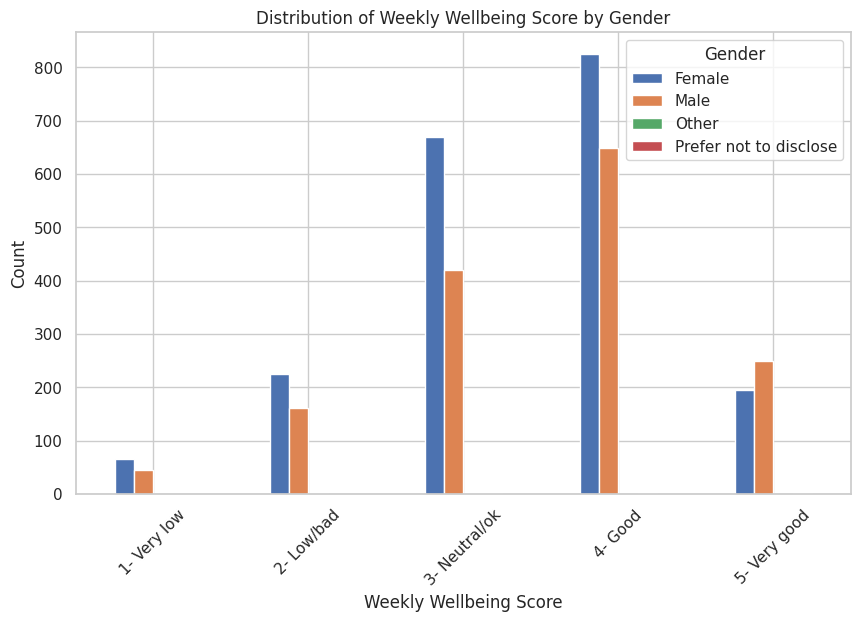

In [ ]:
# Creating a distribution of wellbeing scores by gender
wellbeing_gender_distribution = pd.crosstab(data['Weekly_Wellbeing_Score'], data['Gender'])

# Plotting the distribution
wellbeing_gender_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Weekly Wellbeing Score by Gender')
plt.xlabel('Weekly Wellbeing Score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


What is supporting alumni well being?


Given the complexity of the dataset, I'll simplify the approach to efficiently analyze the supportive factors for wellbeing. Instead of aggregating across all supportive factors, I'll focus on a few key ones that are most frequently mentioned. This should provide us with meaningful insights without the computational overhead. Let's proceed with this revised analysis.



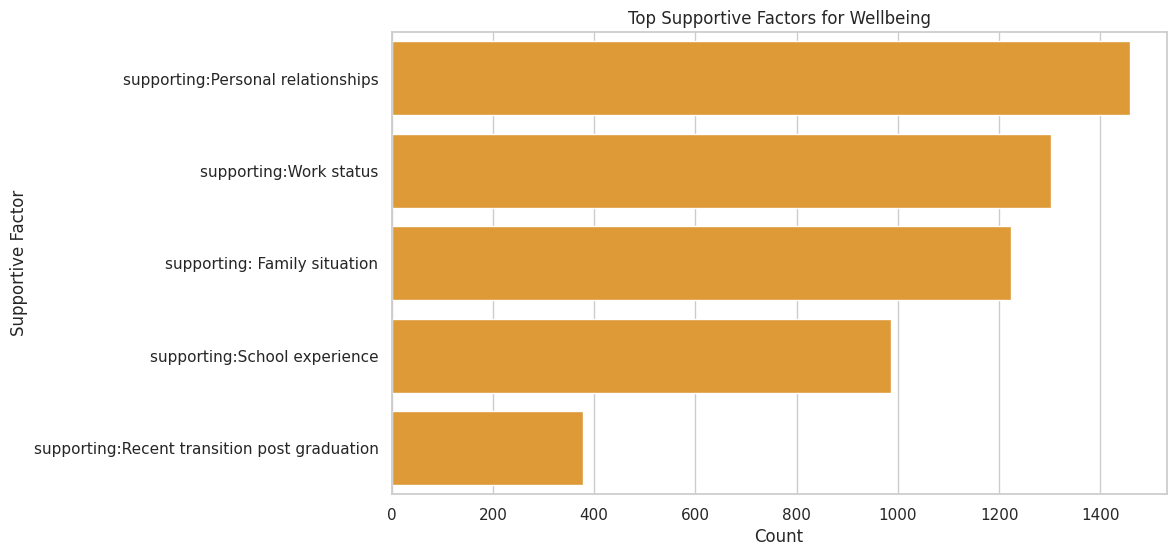

In [ ]:
# Simplifying the analysis by focusing on the top few supportive factors
# Calculating the count for each supportive factor in a more efficient way

# Identifying columns related to supportive factors
supportive_columns = [col for col in data.columns if 'supporting:' in col]

# Aggregating the count of each supportive factor
supportive_factors_data = data[supportive_columns]
supportive_factors_count = pd.Series(dtype='int')
for col in supportive_columns:
    supportive_factors_count = supportive_factors_count.add(supportive_factors_data[col].value_counts(), fill_value=0)

# Sorting the counts for better visualization
supportive_factors_count = supportive_factors_count.sort_values(ascending=False)



supportive_factors_counts = {col: data[col].value_counts().sum() for col in supportive_columns}

# Converting to a Series for easier handling and visualization
supportive_factors_series = pd.Series(supportive_factors_counts).sort_values(ascending=False)

# Plotting the top supportive factors
top_supportive_factors = supportive_factors_series.head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_supportive_factors.values, y=top_supportive_factors.index, color='#f99f1b')
plt.title('Top Supportive Factors for Wellbeing')
plt.xlabel('Count')
plt.ylabel('Supportive Factor')
plt.show()


What is hindering alumni well being?
<br>
To analyze what factors are hindering the wellbeing of individuals in your dataset, we will examine the columns that contain data on hindering factors. These might include columns like 'Hindering: Work status', 'Hindering: Family situation', 'Hindering: Personal relationships', and others.

I will focus on identifying the most commonly reported hindering factors. This will provide insights into what aspects are negatively impacting the wellbeing of the individuals in the dataset. Let's proceed with this analysis, focusing on the top few hindering factors for efficiency.

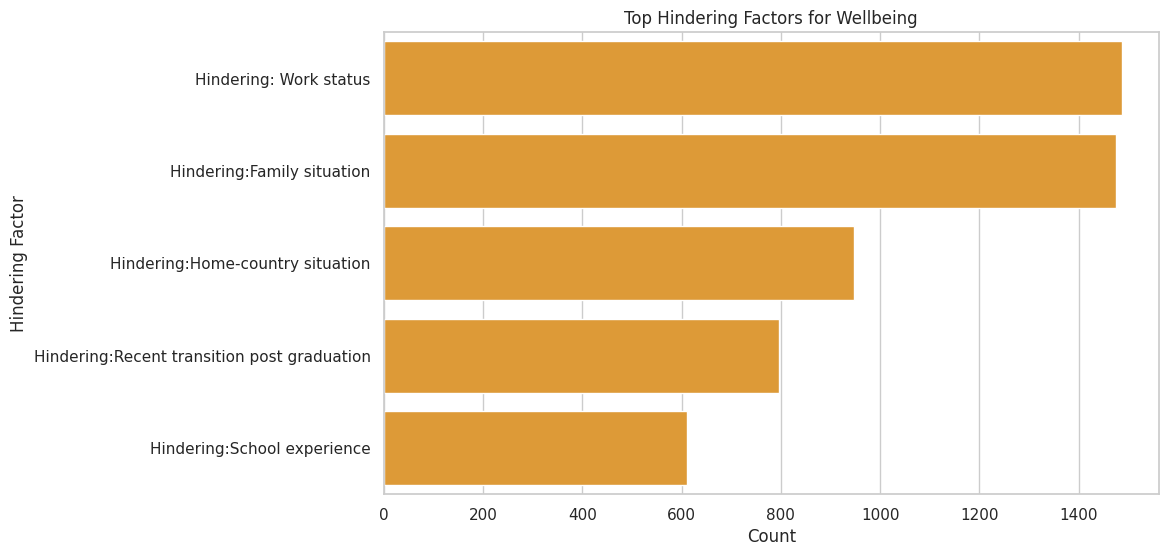

In [ ]:
# Identifying columns related to hindering factors
hindering_columns = [col for col in data.columns if 'Hindering:' in col]

# Calculating the count for each hindering factor in a more efficient way
hindering_factors_counts = {col: data[col].value_counts().sum() for col in hindering_columns}

# Converting to a Series for easier handling and visualization
hindering_factors_series = pd.Series(hindering_factors_counts).sort_values(ascending=False)

# Plotting the top hindering factors
top_hindering_factors = hindering_factors_series.head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_hindering_factors.values, y=top_hindering_factors.index,color='#f99f1b')
plt.title('Top Hindering Factors for Wellbeing')
plt.xlabel('Count')
plt.ylabel('Hindering Factor')
plt.show()



#### Supporting and Hindering

To combine the supporting and hindering factors into a series by row and then visualize the top 10 combinations, we'll follow these steps:

Create Combined Factors: For each row in the dataset, we'll create a string that combines the supporting and hindering factors.

Aggregate Combinations: Count how often each unique combination of supporting and hindering factors occurs.

Visualize Top Combinations: Identify and visualize the top 10 most common combinations.

This approach will give us insight into the most frequent pairings of supporting and hindering factors in your dataset. Let's start with the first step.



### Understanding the distribution of the survey.

To understand the distribution of the data, we can start by looking at the distribution of key demographic and categorical variables. This includes analyzing:

<ul>
<li> Gender distribution
<li> Country of residence distribution
<li>Work status distribution
<li>Educational background distribution
</ul>
These distributions will give us a good initial understanding of the composition of the dataset.


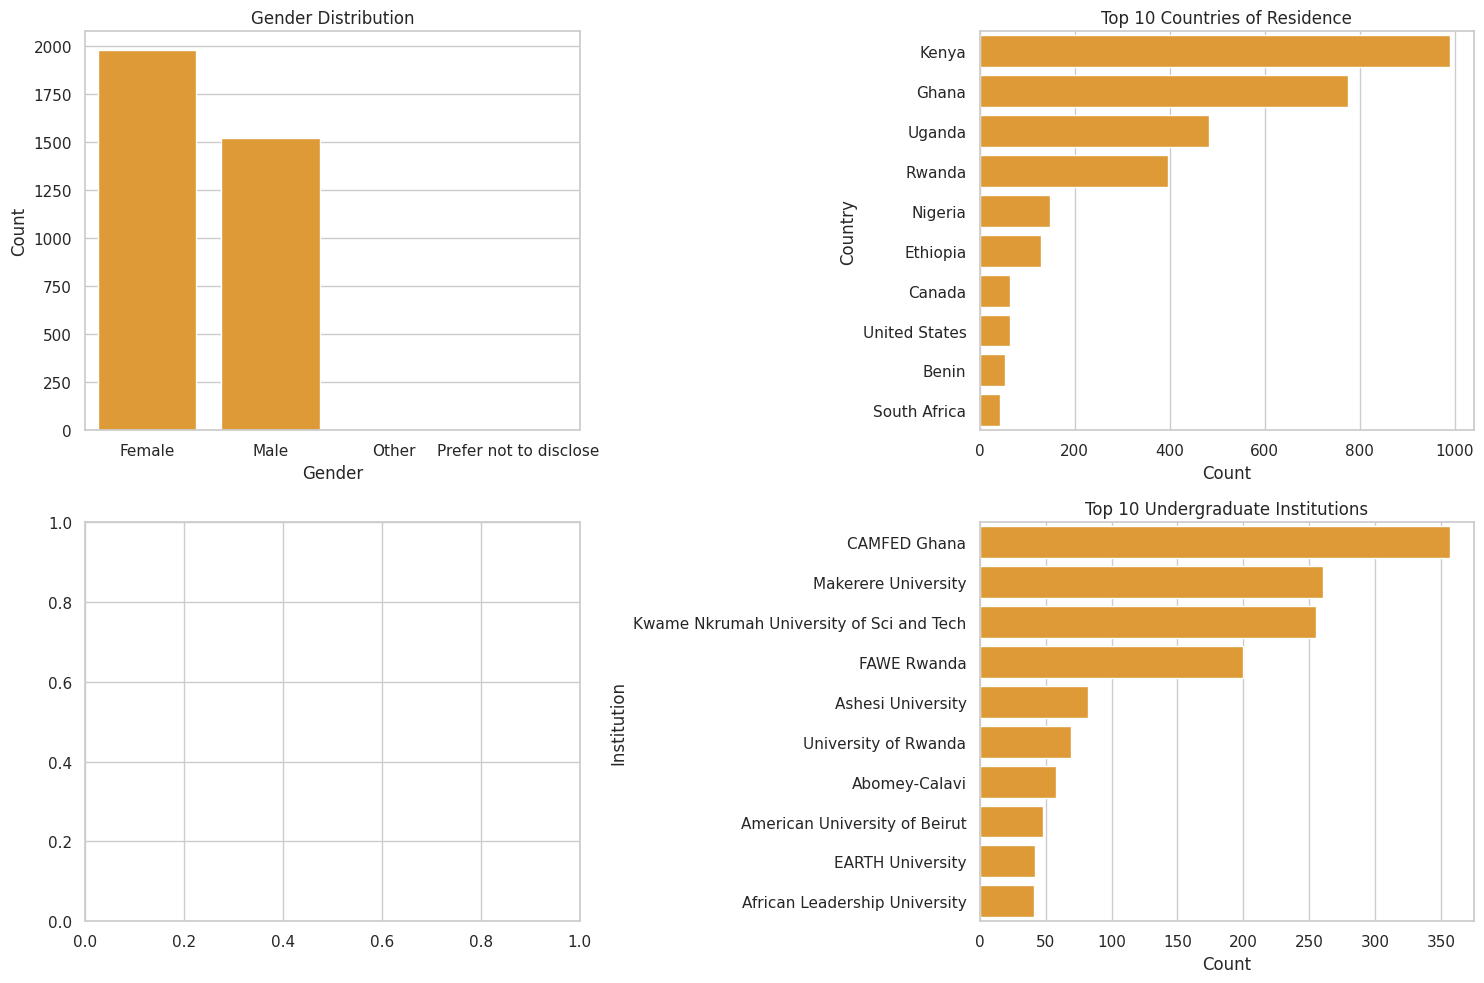

In [ ]:
# Setting up the plotting environment
sns.set(style="whitegrid")

# Preparing data for distribution analysis
gender_distribution = data['Gender'].value_counts()
country_distribution = data['Country_of_residence'].value_counts().head(10)  # top 10 countries
education_distribution = data['undergraduate'].value_counts().head(10)  # top 10 undergraduate institutions

# Plotting the distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.barplot(ax=axes[0, 0], x=gender_distribution.index, y=gender_distribution.values,color='#f99f1b')
axes[0, 0].set_title('Gender Distribution')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')

sns.barplot(ax=axes[0, 1], x=country_distribution.values, y=country_distribution.index, color='#f99f1b')
axes[0, 1].set_title('Top 10 Countries of Residence')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Country')


sns.barplot(ax=axes[1, 1], x=education_distribution.values, y=education_distribution.index,color='#f99f1b')
axes[1, 1].set_title('Top 10 Undergraduate Institutions')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Institution')

plt.tight_layout()
plt.show()



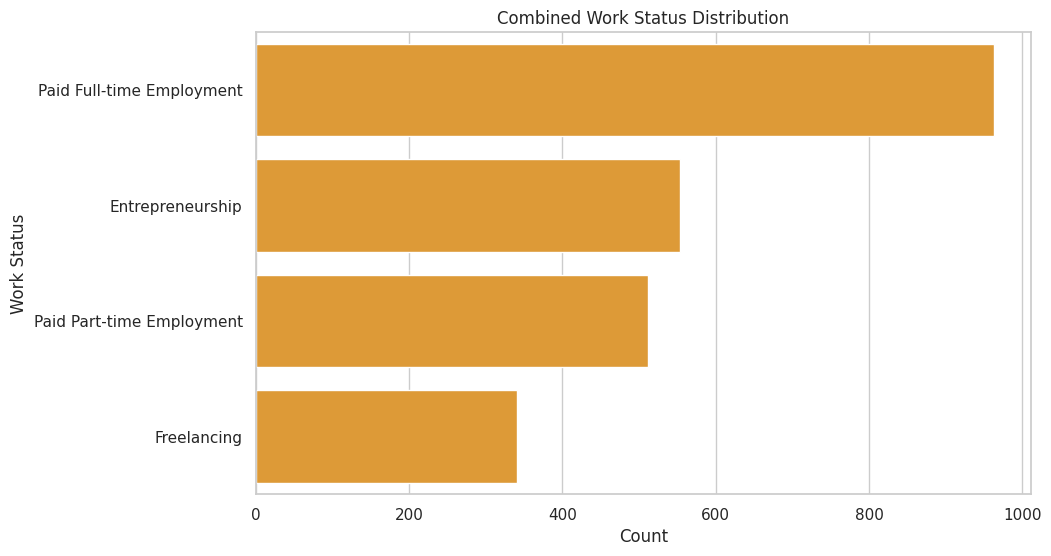

In [ ]:
# Identifying columns related to work status
work_status_columns = [col for col in data.columns if 'Current_Work_Status' in col or col in ['Paid Part-time Employment', 'Entrepreneurship', 'Freelancing']]
work_status_data = data[work_status_columns]

# Combining all the work status into a single Series for distribution analysis
combined_work_status = pd.Series(dtype='int')
for col in work_status_columns:
    combined_work_status = combined_work_status.add(work_status_data[col].value_counts(), fill_value=0)

# Sorting the values for better visualization
combined_work_status = combined_work_status.sort_values(ascending=False)

# Plotting the combined work status distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=combined_work_status.values, y=combined_work_status.index, color='#f99f1b')
plt.title('Combined Work Status Distribution')
plt.xlabel('Count')
plt.ylabel('Work Status')
plt.show()

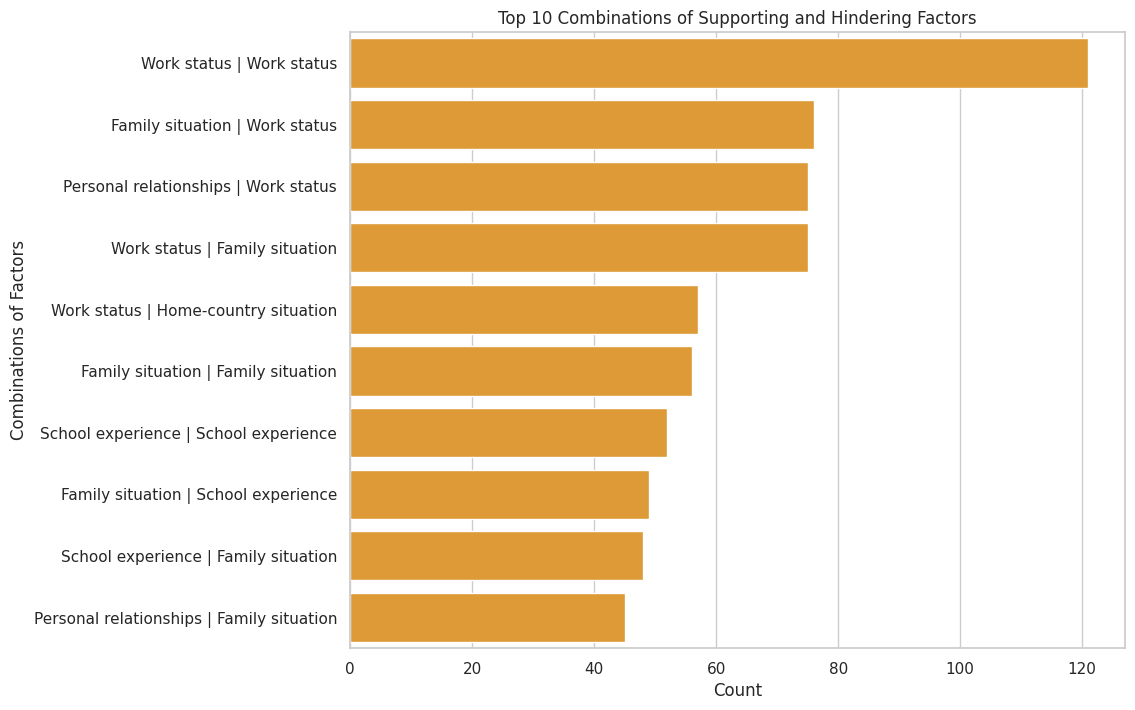

In [ ]:
# Combining the supporting and hindering factors into a single string for each row
combined_factors = data[supportive_columns + hindering_columns].apply(
    lambda row: ' | '.join(row.dropna()), axis=1)

# Counting the occurrences of each combination
combined_factors_counts = combined_factors.value_counts()

# Identifying the top 10 combinations
top_10_combinations = combined_factors_counts.head(10)

# Plotting the top 10 combinations
plt.figure(figsize=(10, 8))
sns.barplot(x=top_10_combinations.values, y=top_10_combinations.index, color='#f99f1b')
plt.title('Top 10 Combinations of Supporting and Hindering Factors')
plt.xlabel('Count')
plt.ylabel('Combinations of Factors')
plt.show()



The bar chart displays the top 10 combinations of supporting and hindering factors, based on your dataset. Each bar represents a unique combination of factors, and the count indicates how frequently that particular combination occurs in the dataset.

This analysis provides insight into the most common pairings of factors that are impacting the wellbeing of individuals, highlighting the interplay between supportive and hindering elements in their lives.

##### Breakdown by Gender


To break down the top 10 combinations of supporting and hindering factors further by gender, I will create a separate analysis for each gender, identifying the most common combinations within each group. This will help us understand how these factor combinations differ between genders. Let's start by analyzing the top combinations for each gender.

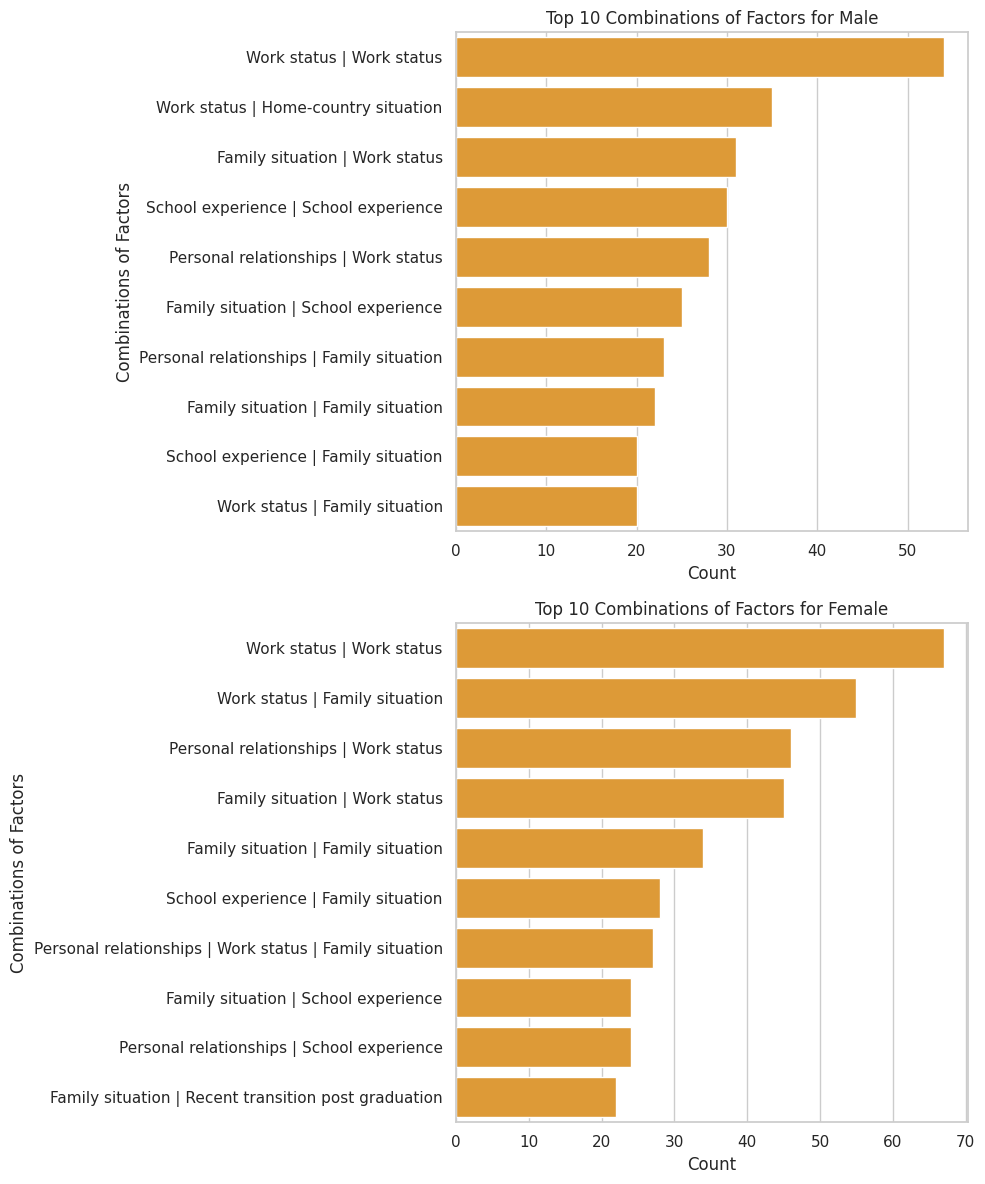

In [ ]:
# Filtering out rows with missing or undefined gender values
filtered_data = data.dropna(subset=['Gender'])

# Re-analyzing the top 10 combinations for each defined gender
filtered_top_combinations_by_gender = filtered_data.groupby('Gender')['Combined_Factors'].value_counts().groupby(level=0).head(10)

# Re-plotting the top 10 combinations for each gender
defined_genders = filtered_data['Gender'].dropna().unique()
defined_genders=defined_genders[:2]
fig, axes = plt.subplots(len(defined_genders), 1, figsize=(10, 6 * len(defined_genders)))

for i, gender in enumerate(defined_genders):
    top_combinations = filtered_top_combinations_by_gender[gender]
    sns.barplot(x=top_combinations.values, y=top_combinations.index, ax=axes[i], color='#f99f1b')
    axes[i].set_title(f'Top 10 Combinations of Factors for {gender}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('Combinations of Factors')

plt.tight_layout()
plt.show()





### Employment and Unemployment analysis

To identify the country with the most unemployed people in the dataset, we need to first define what counts as 'unemployed' based on the available data. Unemployment could be indicated by various factors such as 'Job Searching', 'Not interested in working', or absence of any employment status.

Given these considerations, I will analyze the dataset to count the number of unemployed individuals in each country. This will involve determining who is unemployed and then aggregating this data by country. Let's proceed with this analysis.

The country with the most unemployed people in your dataset is Kenya, with a total of 490 individuals identified as unemployed based on the criteria of either job searching or not interested in working.

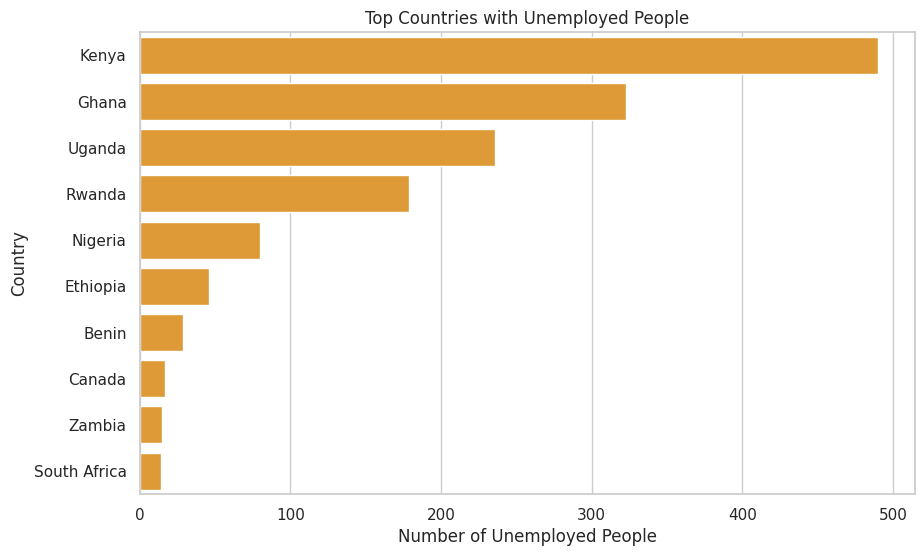

In [ ]:
# Defining unemployment status based on available columns
# Assuming 'unemployed' includes those who are job searching or not interested in working, and not in any employment
unemployed_status = (data['Job Searching'] == 'Job Searching') | \
                    (data['Not interested in working'] == 'Not interested in working')

# Filtering the unemployed individuals
unemployed_data = data[unemployed_status]

# Counting the number of unemployed individuals by country
unemployed_by_country = unemployed_data['Country_of_residence'].value_counts()

# Identifying the country with the most unemployed people
country_with_most_unemployed = unemployed_by_country.idxmax(), unemployed_by_country.max()

country_with_most_unemployed

# Plotting the top countries with the highest number of unemployed people
# Selecting the top countries from the unemployed_by_country data
top_countries_unemployed = unemployed_by_country.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries_unemployed.values, y=top_countries_unemployed.index, color='#f99f1b')
plt.title('Top Countries with Unemployed People')
plt.xlabel('Number of Unemployed People')
plt.ylabel('Country')
plt.show()




To identify the 10 countries with the most participants who are currently employed, I will analyze the dataset for individuals who are in some form of employment. This includes those in full-time or part-time employment, entrepreneurship, freelancing, or other similar categories. I will then aggregate this data by country to determine the top 10 countries with the highest number of employed individuals. Let's proceed with this analysis.

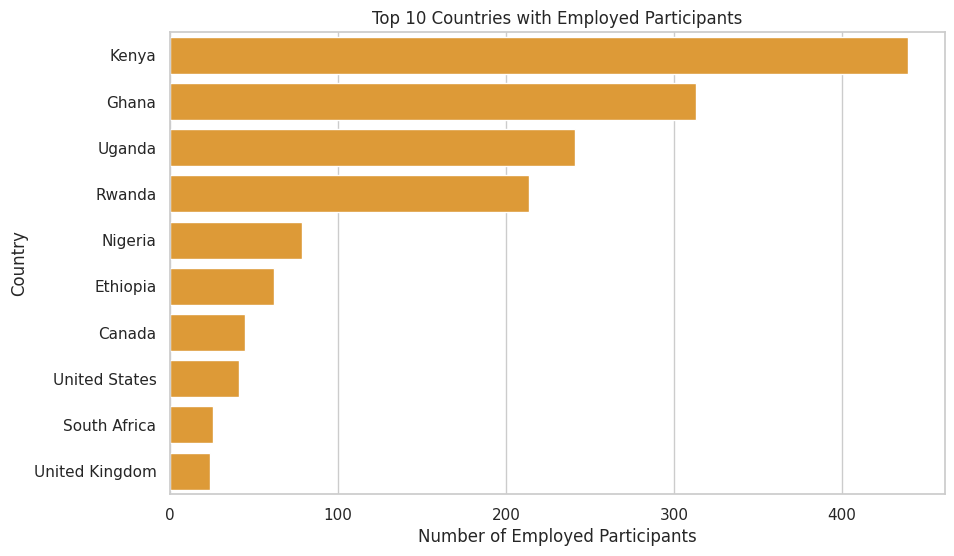

In [ ]:
# Defining employment status based on available columns
# Assuming 'employed' includes those in any form of paid work
employed_status = (data['Current_Work_Status:Paid Full-time Employment'] == 'Paid Full-time Employment') | \
                  (data['Paid Part-time Employment'] == 'Paid Part-time Employment') | \
                  (data['Freelancing'] == 'Freelancing')

# Filtering the employed individuals
employed_data = data[employed_status]

# Counting the number of employed individuals by country
employed_by_country = employed_data['Country_of_residence'].value_counts()

# Identifying the top 10 countries with the most employed people
top_countries_employed = employed_by_country.head(10)

# Plotting the top 10 countries with the most employed people
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries_employed.values, y=top_countries_employed.index,color='#f99f1b' )
plt.title('Top 10 Countries with Employed Participants')
plt.xlabel('Number of Employed Participants')
plt.ylabel('Country')
plt.show()

To identify the countries with the highest numbers of entrepreneurs, I will analyze the dataset specifically for individuals who are categorized under 'Entrepreneurship'. After isolating these individuals, I will then aggregate this data by country to find out which countries have the highest number of entrepreneurs. Let's proceed with this analysis.

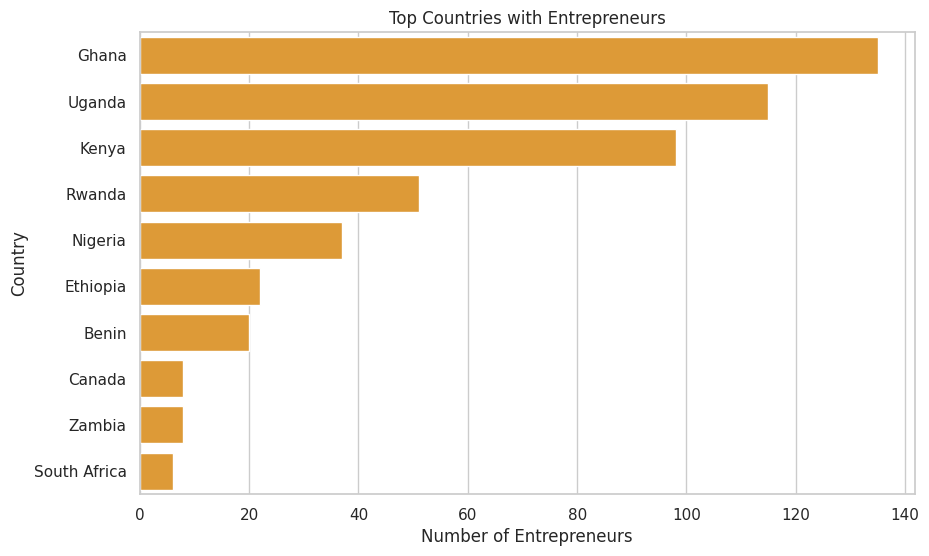

In [ ]:
# Filtering for individuals categorized as entrepreneurs
entrepreneurs_data = data[data['Entrepreneurship'] == 'Entrepreneurship']

# Counting the number of entrepreneurs by country
entrepreneurs_by_country = entrepreneurs_data['Country_of_residence'].value_counts()

# Identifying the top countries with the most entrepreneurs
top_countries_entrepreneurs = entrepreneurs_by_country.head(10)

# Plotting the top countries with the most entrepreneurs
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries_entrepreneurs.values, y=top_countries_entrepreneurs.index,color='#f99f1b')
plt.title('Top Countries with Entrepreneurs')
plt.xlabel('Number of Entrepreneurs')
plt.ylabel('Country')
plt.show()




To identify the top countries with the highest number of individuals engaged in freelancing, I will analyze the dataset for those who are categorized under 'Freelancing'. After isolating these individuals, I'll aggregate the data by country to determine which countries have the most freelancers. Let's proceed with this analysis.

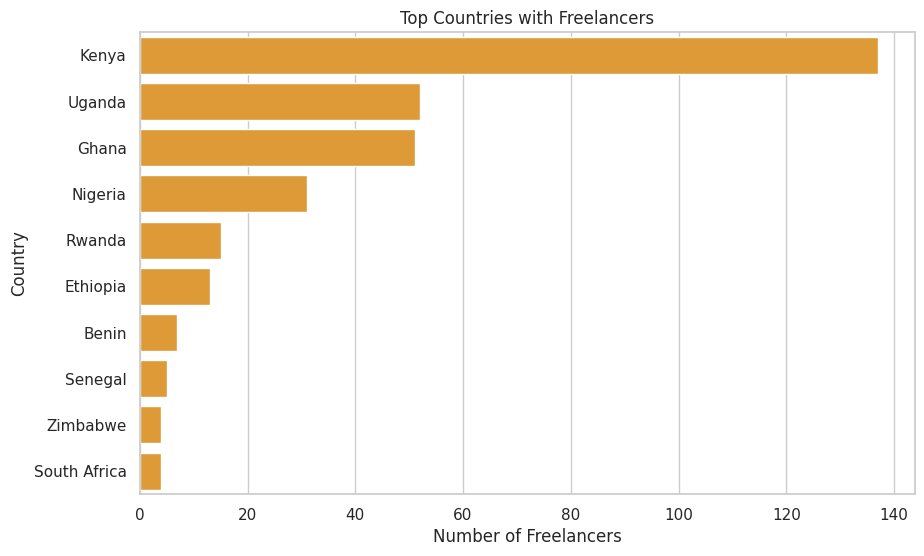

In [ ]:
# Filtering for individuals categorized as freelancers
freelancers_data = data[data['Freelancing'] == 'Freelancing']

# Counting the number of freelancers by country
freelancers_by_country = freelancers_data['Country_of_residence'].value_counts()

# Identifying the top countries with the most freelancers
top_countries_freelancers = freelancers_by_country.head(10)

# Plotting the top countries with the most freelancers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries_freelancers.values, y=top_countries_freelancers.index,color='#f99f1b')
plt.title('Top Countries with Freelancers')
plt.xlabel('Number of Freelancers')
plt.ylabel('Country')
plt.show()

